In [1]:
import pandas as pd
from pathlib import Path

In [5]:
notebook_dir = Path.cwd()
return_data = pd.read_parquet(notebook_dir / 'data' / 'returns_per_period' / 'returns_1998.parquet')
return_data

,stock,date,return,sequence,Class0,Class1
0,AAPL.OQ,1995-12-14,-0.234178,"[1.394498323671849, -0.7586869737490951, 4.413...",0,1
1,AAPL.OQ,1995-12-15,-4.410867,"[-0.7586869737490951, 4.413022075404569, -1.10...",1,0
2,AAPL.OQ,1995-12-18,-4.781735,"[4.413022075404569, -1.107362639359629, 3.2968...",1,0
3,AAPL.OQ,1995-12-19,0.808120,"[-1.107362639359629, 3.2968035916089224, 3.841...",0,1
4,AAPL.OQ,1995-12-20,-0.265260,"[3.2968035916089224, 3.8414088805262936, -1.68...",0,1
...,...,...,...,...,...,...
357253,YUM.N,1998-12-24,-0.843838,"[-0.053213536111970855, -0.053213536111970855,...",1,0
357254,YUM.N,1998-12-28,0.019698,"[-0.053213536111970855, 1.2759710805489741, 0....",0,1
357255,YUM.N,1998-12-29,1.403128,"[1.2759710805489741, 0.33621466901724584, 1.49...",0,1
357256,YUM.N,1998-12-30,1.862632,"[0.33621466901724584, 1.4936913670391696, -0.6...",0,1


In [6]:
data = return_data.rename(columns={'sequence': 'return_sequence'})

### Gettting data for covariates

<Axes: title={'center': 'Oil Prices Over Time'}, xlabel='date'>

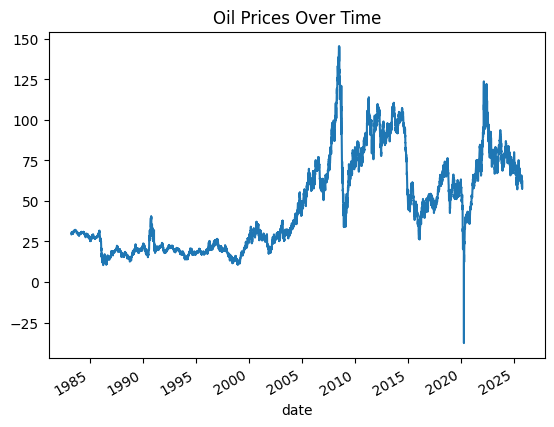

In [16]:
oil = pd.read_csv(notebook_dir.parent.parent / 'confidential_data' / 'Bloomberg' / 'oil_prices.csv', index_col='date', parse_dates=['date'])
oil = oil['PX_LAST'].rename('oil_price')
oil.plot(title='Oil Prices Over Time')

In [17]:
oil.describe()

count    10677.000000
mean        46.902295
std         28.866309
min        -37.630000
25%         20.630000
50%         36.710000
75%         69.510000
max        145.290000
Name: oil_price, dtype: float64

In [ ]:
# get dates for negative oil prices
oil[oil < 0]

date
2020-04-20   -37.63
Name: oil_price, dtype: float64

In [26]:
oil_returns = oil.pct_change(fill_method=None).rename('oil_return')
oil_returns = oil_returns.dropna()
oil_returns.describe()

count    10672.000000
mean         0.000041
std          0.040592
min         -3.059661
25%         -0.010885
50%          0.000436
75%          0.012037
max          0.376623
Name: oil_return, dtype: float64

<Axes: xlabel='date'>

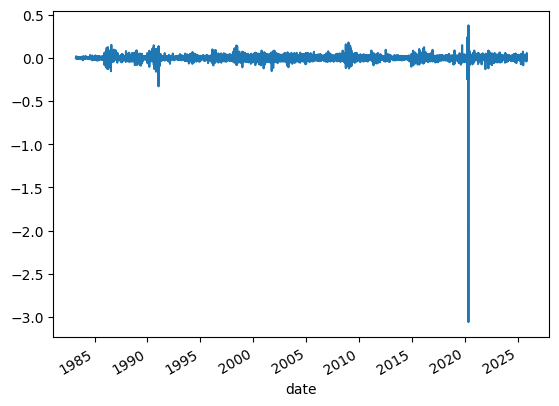

In [27]:
oil_returns.plot()

In [28]:
# starting from observation 241, create sequence of last 240 oil returns
oil_return_sequences = []
sequence_length = 240
for i in range(sequence_length, len(oil_returns)):
    oil_return_sequences.append(oil_returns.iloc[i-sequence_length:i].values)
oil_return_sequences = pd.DataFrame({'date': oil_returns.index[sequence_length:], 'oil_return_sequence': oil_return_sequences})
oil_return_sequences

,date,oil_return_sequence
0,1984-03-22,"[-0.0037414965986394266, 0.005121201775349915,..."
1,1984-03-23,"[0.005121201775349915, 0.009171195652173836, 0..."
2,1984-03-26,"[0.009171195652173836, 0.006395153147088495, 0..."
3,1984-03-27,"[0.006395153147088495, 0.009030100334448177, 0..."
4,1984-03-28,"[0.009030100334448177, 0.006960556844547439, -..."
...,...,...
10427,2025-10-20,"[0.028493308389696326, 0.0072757800475724554, ..."
10428,2025-10-21,"[0.0072757800475724554, -0.004167245450756973,..."
10429,2025-10-22,"[-0.004167245450756973, 0.009345794392523477, ..."
10430,2025-10-23,"[0.009345794392523477, -0.027363184079602032, ..."


Add oil return sequence to data

In [29]:
data = data.merge(oil_return_sequences, on='date', how='left')
data

,stock,date,return,return_sequence,Class0,Class1,oil_return_sequence
0,AAPL.OQ,1995-12-14,-0.234178,"[1.394498323671849, -0.7586869737490951, 4.413...",0,1,"[0.0022573363431153126, -0.018018018018018056,..."
1,AAPL.OQ,1995-12-15,-4.410867,"[-0.7586869737490951, 4.413022075404569, -1.10...",1,0,"[-0.018018018018018056, 0.002293577981651307, ..."
2,AAPL.OQ,1995-12-18,-4.781735,"[4.413022075404569, -1.107362639359629, 3.2968...",1,0,"[0.002293577981651307, 0.013729977116704761, -..."
3,AAPL.OQ,1995-12-19,0.808120,"[-1.107362639359629, 3.2968035916089224, 3.841...",0,1,"[0.013729977116704761, -0.0028216704288936967,..."
4,AAPL.OQ,1995-12-20,-0.265260,"[3.2968035916089224, 3.8414088805262936, -1.68...",0,1,"[-0.0028216704288936967, -0.015280135823429686..."
...,...,...,...,...,...,...,...
357253,YUM.N,1998-12-24,-0.843838,"[-0.053213536111970855, -0.053213536111970855,...",1,0,"[-0.02003535651149091, -0.009621166566446182, ..."
357254,YUM.N,1998-12-28,0.019698,"[-0.053213536111970855, 1.2759710805489741, 0....",0,1,"[-0.009621166566446182, -0.0024286581663630624..."
357255,YUM.N,1998-12-29,1.403128,"[1.2759710805489741, 0.33621466901724584, 1.49...",0,1,"[-0.0024286581663630624, 0.00121728545343891, ..."
357256,YUM.N,1998-12-30,1.862632,"[0.33621466901724584, 1.4936913670391696, -0.6...",0,1,"[0.00121728545343891, -0.006686930091185372, 0..."
